# Inicialização das Bibliotecas

In [269]:
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros do Sistema

In [270]:
L = 20               #Tamanho da Malha
T = 1.0              #Temperatura em unidades de ε/k
steps = 5000         #Número de passos de Monte Carlo

# Inicialização da Malha

A malha é iniciada com 25% de spin up (+1) e 75% de spin down (-1). Posteriormente, os spins up serão representados no gráfico como quadrados pretos e os down como quadrados brancos.

In [271]:
N = L * L                                 #Linhas x Colunas
n_up = int(0.25 * N)                      #Número total de spins up
n_down = N - n_up                         #Número total de spins down
spins = np.array([1]*n_up + [-1]*n_down)  #Vetor com os spins
np.random.shuffle(spins)                  #Inicialização randomizada
s = spins.reshape((L, L))                 #O vetor é transformado em uma Matriz L x L

#Guarda o estado inicial para exibição no final
s_initial = s.copy()

# Função para calcular $\Delta U$ com condições de contorno periódicas

In [272]:
def deltaU(s, i, j):
    top    = s[(i-1)%L, j]
    bottom = s[(i+1)%L, j]
    left   = s[i, (j-1)%L]
    right  = s[i, (j+1)%L]
    return 2 * s[i, j] * (top + bottom + left + right)

# Aplicação do Algoritmo de Metropolis

In [273]:
for _ in range(steps):
    i = np.random.randint(0, L)
    j = np.random.randint(0, L)
    dE = deltaU(s, i, j)
    if dE <= 0 or np.random.rand() < np.exp(-dE / T):
        s[i, j] *= -1  #Flip do spin

# Função para desenhar a Malha com grades

**Observação:** Aqui "inverti" os valores dos spins por motivos **puramente gráficos**, pois a função cmap do matplotlib considera preto para valores -1 e branco para valores +1.

In [274]:
def plot_with_grid(ax, matrix, title):
    #Inverter sinal para preto = up (+1), branco = down (-1)
    grid = -matrix
    #Criar bordas para cada célula
    x = np.arange(grid.shape[1] + 1)
    y = np.arange(grid.shape[0] + 1)
    #Colormap personalizado: branco e preto
    cmap = plt.get_cmap('gray')
    #Plota com células bem definidas
    mesh = ax.pcolormesh(x, y, grid, cmap=cmap, edgecolors='gray', linewidth=0.5)
    ax.set_aspect('equal')
    ax.set_title(title)
    ax.axis('off')

# Gerar o gráfico mostrando o Estado Inicial e o Estado Final após 5000 passos

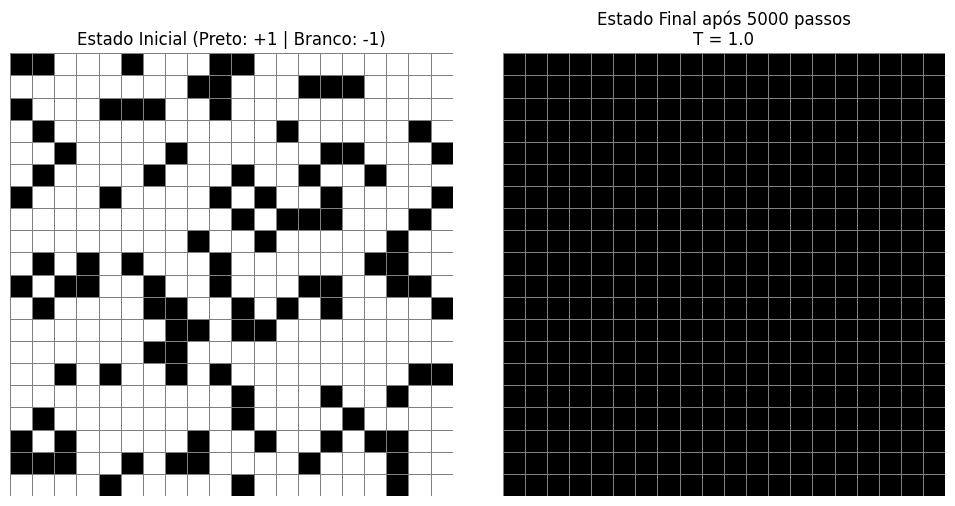

In [275]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

plot_with_grid(axes[0], s_initial, "Estado Inicial (Preto: +1 | Branco: -1)")
plot_with_grid(axes[1], s, f"Estado Final após {steps} passos\nT = {T}")

plt.tight_layout()
plt.show()